In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

In [20]:
from sklearn.model_selection import cross_val_score, cross_val_predict

# Leer los archivos CSV
train_data = pd.read_csv('datasets/wesad-classification-hrv-train-dataset.csv')
test_data = pd.read_csv('datasets/wesad-classification-hrv-test-dataset.csv')

# Eliminar columnas de tipo string
train_data = train_data.select_dtypes(exclude=['object'])
test_data = test_data.select_dtypes(exclude=['object'])

# Asumiendo que 'condition label' es la columna objetivo
X_train = train_data.drop('condition label', axis=1)
y_train = train_data['condition label']

X_test = test_data.drop('condition label', axis=1)
y_test = test_data['condition label']

# Entrenar el modelo con validación cruzada de 5-Fold
rf = RandomForestClassifier(n_estimators=100, random_state=0)
scores = cross_val_score(rf, X_train, y_train, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

# Predicciones con validación cruzada
predictions = cross_val_predict(rf, X_test, y_test, cv=5)

# Métricas de evaluación
print("Confusion Matrix: ")
print(confusion_matrix(y_test, predictions))
print("Classification Report: ")
print(classification_report(y_test, predictions))
print("Accuracy: ", accuracy_score(y_test, predictions))

Cross-validation scores:  [1. 1. 1. 1. 1.]
Mean cross-validation score:  1.0
Confusion Matrix: 
[[7221    3    5]
 [   8 2305    0]
 [   2    1 4020]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7229
           1       1.00      1.00      1.00      2313
           2       1.00      1.00      1.00      4023

    accuracy                           1.00     13565
   macro avg       1.00      1.00      1.00     13565
weighted avg       1.00      1.00      1.00     13565

Accuracy:  0.998599336527829


In [14]:
# Leer los archivos CSV
train_data = pd.read_csv('datasets/wesad-classification-hrv-train-dataset.csv')
validation_data = pd.read_csv('datasets/wesad-classification-hrv-validation-dataset.csv')
test_data = pd.read_csv('datasets/wesad-classification-hrv-test-dataset.csv')

# Eliminar columnas de tipo string
train_data = train_data.select_dtypes(exclude=['object'])
validation_data = validation_data.select_dtypes(exclude=['object'])
test_data = test_data.select_dtypes(exclude=['object'])

# Asumiendo que 'condition label' es la columna objetivo
X_train = train_data.drop('condition label', axis=1)
y_train = train_data['condition label']

X_validation = validation_data.drop('condition label', axis=1)
y_validation = validation_data['condition label']

X_test = test_data.drop('condition label', axis=1)
y_test = test_data['condition label']

# Codificar las etiquetas si son categóricas
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_validation = encoder.transform(y_validation)
y_test = encoder.transform(y_test)

# Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)

# Validar el modelo
validation_predictions = rf.predict(X_validation)

print("Validation Accuracy: ", accuracy_score(y_validation, validation_predictions))
print("Validation Confusion Matrix: ")
print(confusion_matrix(y_validation, validation_predictions))
print("Validation Classification Report: ")
print(classification_report(y_validation, validation_predictions))

# Probar el modelo
test_predictions = rf.predict(X_test)

print("Test Accuracy: ", accuracy_score(y_test, test_predictions))
print("Test Confusion Matrix: ")
print(confusion_matrix(y_test, test_predictions))
print("Test Classification Report: ")
print(classification_report(y_test, test_predictions))

Validation Accuracy:  1.0
Validation Confusion Matrix: 
[[7213    0    0]
 [   0 2242    0]
 [   0    0 4110]]
Validation Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7213
           1       1.00      1.00      1.00      2242
           2       1.00      1.00      1.00      4110

    accuracy                           1.00     13565
   macro avg       1.00      1.00      1.00     13565
weighted avg       1.00      1.00      1.00     13565

Test Accuracy:  1.0
Test Confusion Matrix: 
[[7229    0    0]
 [   0 2313    0]
 [   0    0 4023]]
Test Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7229
           1       1.00      1.00      1.00      2313
           2       1.00      1.00      1.00      4023

    accuracy                           1.00     13565
   macro avg       1.00      1.00      1.00     13565
weighted avg       

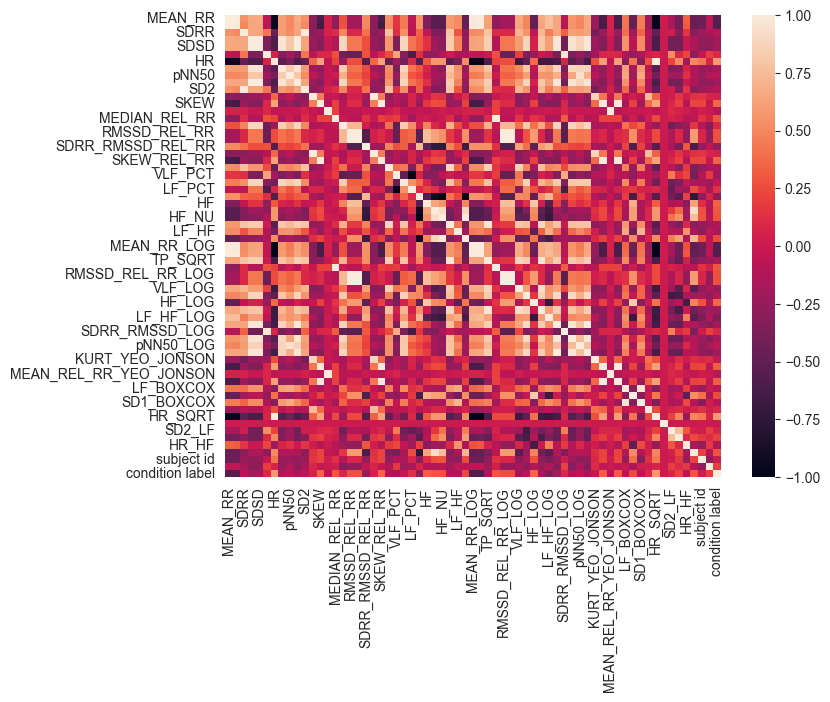

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Vamos a suponer que tus datos son los de entrenamiento. Puedes cambiar esto a tus datos de validación o prueba si prefieres.
data = train_data.select_dtypes(exclude=['string'])

corr_df = data.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=False)
plt.show()